<a href="https://colab.research.google.com/github/Srijavali/Forest_Fire_Detection/blob/main/Forest_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
#importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is Available!')
else:
    print('GPU is not Available!')

GPU is Available!


In [ ]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [ ]:
#List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)
#Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


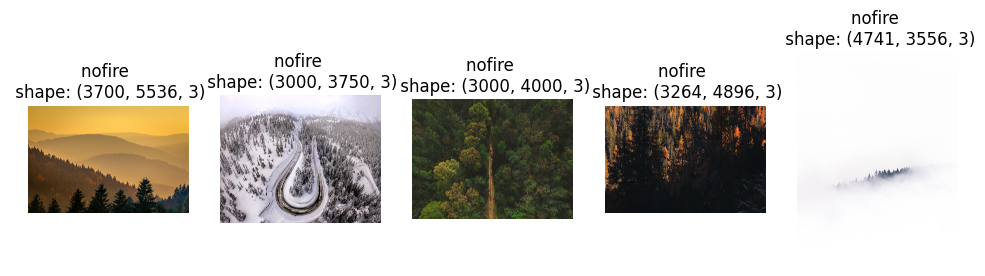

In [ ]:
#Lets visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

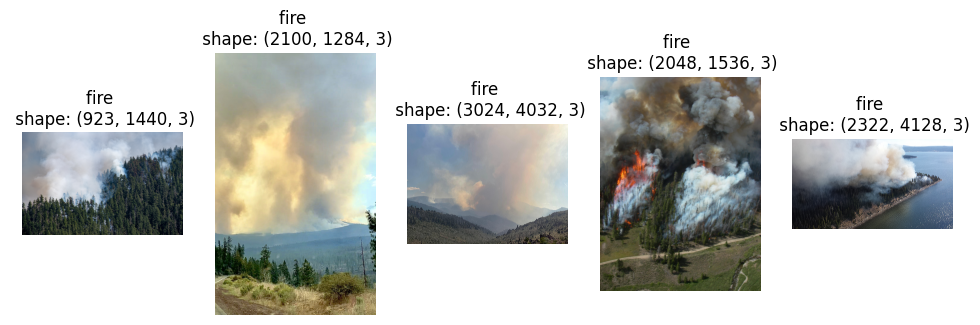

In [ ]:
#Lets visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
#Pre processing
#Image dimensions and batch size
img_width , img_height = 150, 150
batch_size = 32 #Each batch contains 32 images

#Data Generators
train_datagenerator = ImageDataGenerator(rescale=1./255) # it is an instance which takes the class image data generator
val_datagenerator = ImageDataGenerator(rescale=1./255) # 0-255 decides the color variation in the pixels
test_datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagenerator.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', #can have categorical or sparse encoding it may vary for unsupervised learning
    shuffle=True
)

val_generator = val_datagenerator.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagenerator.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
# Mapping the indices
class_mapping = train_generator.class_indices
print(class_mapping)
# going to extract the class names
class_names = list(class_mapping.keys())
print("Class_Names: ",class_names)

{'fire': 0, 'nofire': 1}
Class_Names:  ['fire', 'nofire']


In [ ]:
# To Buid the CNN model (Convolution Nueral Network)
model = Sequential([
    Input(shape=(img_width,img_height,3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), #To decrease the spatial dimension
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), # to flatten the dimention or to lower dimension or one dimension
    Dense(512, activation='relu'),
    Dropout(0.5), #to avoid over fitting as we dont need model to learn everything
    Dense(1, activation='sigmoid') #as it is a output layer we use sigmoid as an active function and here 1 is the nuerons number present in the convolution layer
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
14/58 ━━━━━━━━━━━━━━━━━━━━ 4:50 7s/step - accuracy: 0.5764 - loss: 1.2837

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


46/58 ━━━━━━━━━━━━━━━━━━━━ 1:18 7s/step - accuracy: 0.6152 - loss: 0.9298

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 489s 8s/step - accuracy: 0.6260 - loss: 0.8720 - val_accuracy: 0.6979 - val_loss: 0.5476
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6875 - loss: 0.5792

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6875 - loss: 0.5792 - val_accuracy: 0.7109 - val_loss: 0.5239
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 500s 9s/step - accuracy: 0.7312 - loss: 0.5128 - val_accuracy: 0.7344 - val_loss: 0.5375
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7188 - loss: 0.6783 - val_accuracy: 0.7734 - val_loss: 0.4651
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 444s 8s/step - accuracy: 0.7833 - loss: 0.4564 - val_accuracy: 0.7682 - val_loss: 0.4747
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7500 - loss: 0.4431 - val_accuracy: 0.7786 - val_loss: 0.4689
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 507s 8s/step - accuracy: 0.7625 - loss: 0.4808 - val_accuracy: 0.7682 - val_loss: 0.4585
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6562 - loss: 0.5077 - val_accuracy: 0.7708 - val_loss: 0.4499
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 448s 8s/step - accuracy: 0.7973 - loss: 0.4222 - val_accuracy: 0.8229 - val_loss: 0.4079

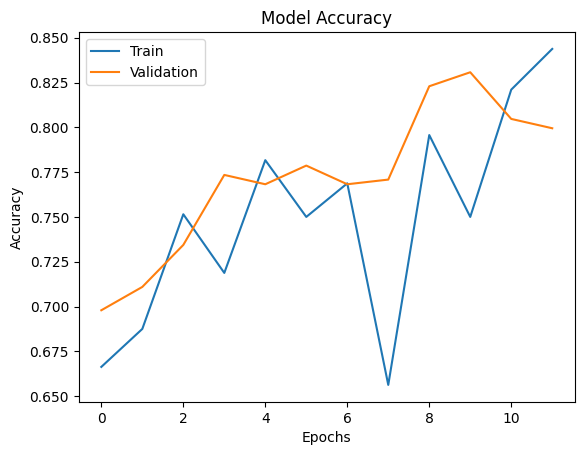

In [ ]:
# Evaluation of the Model
# By plotting the training and validation accuracy we can evaluate the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

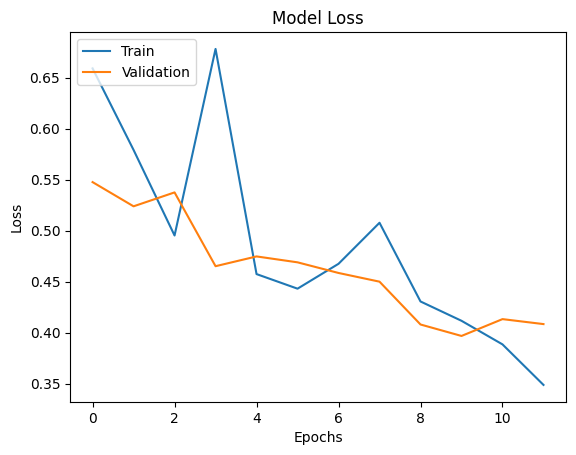

In [ ]:
# Evaluation of the Model
# By plotting the training and validation Loss we can evaluate the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model using the test data
test_loss, test_accuracy = model.evaluate(test_generator,steps=test_generator.samples)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

  2/410 ━━━━━━━━━━━━━━━━━━━━ 53:16 8s/step - accuracy: 0.8125 - loss: 0.3333

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 10/410 ━━━━━━━━━━━━━━━━━━━━ 48:41 7s/step - accuracy: 0.8081 - loss: 0.3933

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


410/410 ━━━━━━━━━━━━━━━━━━━━ 96s 218ms/step - accuracy: 0.8026 - loss: 0.4008
Test Loss: 0.4009
Test Accuracy: 0.8024


In [ ]:
# Saving the Model
model.save('FFD.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Loding the model
model = load_model('FFD.keras')

# Predicting on new Image -- Creating a Function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150,150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0
  prediction = model.predict(img_array)
  if prediction[0]>0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step


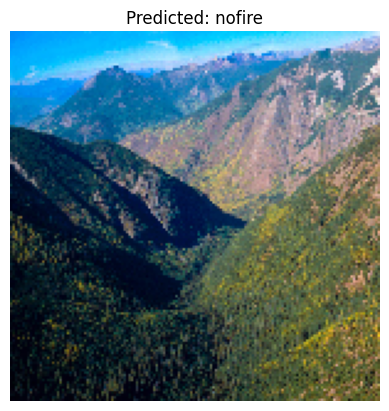

In [25]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/23289748533_1a14a0f249_o.jpg')